In [20]:
from matplotlib import rc

plt.style.use('seaborn')
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

In [19]:
%matplotlib inline

In [1]:
from sklearn.datasets import load_boston

boston = load_boston()

dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)

model1 = sm.OLS.from_formula("MEDV ~ " + "+".join(boston.feature_names), data=df)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 14 May 2020   Prob (F-statistic):          6.72e-135
Time:                        10:11:58   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.

- 조건수(conditiona number)가 15100으로 너무 큽니다. 
강한 다중공선성(multicollinearity)이나 다른 수치적 문제가 있을 수 있습니다.

#### 조건수에 따른 해의 값 변화
- Ax = b
- A : 공분산 행렬, x : 해, b : 상수 벡터

In [2]:
# A가 조건수가 1인 단위벡터인 경우
A = np.eye(4)

In [3]:
# 오차가 없는 경우의 해
b = np.ones(4)
x = sp.linalg.solve(A, b)
x

array([1., 1., 1., 1.])

In [4]:
# 행렬 A에 1/10000 오차가 생기면 x도 유사한 정도의 오차 발생
x_error = sp.linalg.solve(A + 0.0001 * np.eye(4), b)
x_error

array([0.99990001, 0.99990001, 0.99990001, 0.99990001])

In [5]:
#  조건수가 15513인 4차 힐버트 행렬 A
A = sp.linalg.hilbert(4)
np.linalg.cond(A)

15513.738738929038

In [6]:
# 오차가 없는 경우의 x의 해
sp.linalg.solve(A, b)

array([  -4.,   60., -180.,  140.])

In [7]:
# 행렬 A에 1/10000 오차가 발생한 경우
# 행렬수가 크면 해의 값이 전혀 달라짐
# 공분산행렬의 조건수가 크면 회귀분석을 사용한 예측값도 오차가 커진다
sp.linalg.solve(A + 0.00001 * np.eye(4), b)

array([  -3.36564804,   52.80966559, -162.62369634,  128.67499072])

#### 회귀분석과 조건수

In [8]:
# 보스턴 집값의 표준편차
dfX.describe().loc["std"]

CRIM         8.601545
ZN          23.322453
INDUS        6.860353
CHAS         0.253994
NOX          0.115878
RM           0.702617
AGE         28.148861
DIS          2.105710
RAD          8.707259
TAX        168.537116
PTRATIO      2.164946
B           91.294864
LSTAT        7.141062
Name: std, dtype: float64

In [9]:
# TAX의 값을 크게 만들어 조건수를 크게 만듬
# 이 경우 조건수가 1조가 넘는 값이 나옴
# R-squared(성능 지표)가 감소함 -> 회귀분석 모델 자체의 성능도 감소함
dfX2 = dfX.copy()
dfX2["TAX"] *= 1e13
df2 = pd.concat([dfX2, dfy], axis=1)

model2 = sm.OLS.from_formula("MEDV ~ " + "+".join(boston.feature_names), data=df2)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     83.39
Date:                Thu, 14 May 2020   Prob (F-statistic):           8.62e-44
Time:                        10:45:32   Log-Likelihood:                -1737.9
No. Observations:                 506   AIC:                             3484.
Df Residuals:                     502   BIC:                             3501.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0038      0.000     -8.543      0.0

In [10]:
# 스케일링을 통해 조건수 문제가 해결된 것을 볼수 있음
# 다음 코드는 다시 분석해볼 것
feature_names = list(boston.feature_names)
# CHAS는 카테고리 더미분포이기 때문에 스케일을 하지 않음
feature_names.remove("CHAS") 
feature_names = ["scale({})".format(name) for name in feature_names] + ["CHAS"]
model3 = sm.OLS.from_formula("MEDV ~ " + "+".join(feature_names), data=df2)
result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 14 May 2020   Prob (F-statistic):          6.72e-135
Time:                        10:47:42   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         22.3470      0.219    101.

#### 범주형 독립변수
- 풀랭크 방식을 사용할때는 상수항을 포함하지 않음

In [12]:
#  노팅엄 지역 월 평균 기온
# 월은 1~12까지 범주형 데이터
import datetime
from calendar import isleap

def convert_partial_year(number):
    "연 단위 숫자에서 날짜를 계산하는 코드"
    year = int(number)
    d = datetime.timedelta(days=(number - year) * (365 + isleap(year)))
    day_one = datetime.datetime(year, 1, 1)
    date = d + day_one
    return date

df_nottem = sm.datasets.get_rdataset("nottem").data
df_nottem["date0"] = df_nottem[["time"]].applymap(convert_partial_year)
df_nottem["date"] = pd.DatetimeIndex(df_nottem["date0"]).round('60min') + datetime.timedelta(seconds=3600*24)
df_nottem["month"] = df_nottem["date"].dt.strftime("%m").astype('category')
del df_nottem["date0"], df_nottem["date"]
df_nottem.tail()

,time,value,month
235,1939.583333,61.8,08
236,1939.666667,58.2,09
237,1939.750000,46.7,10
238,1939.833333,46.6,11
239,1939.916667,37.8,12


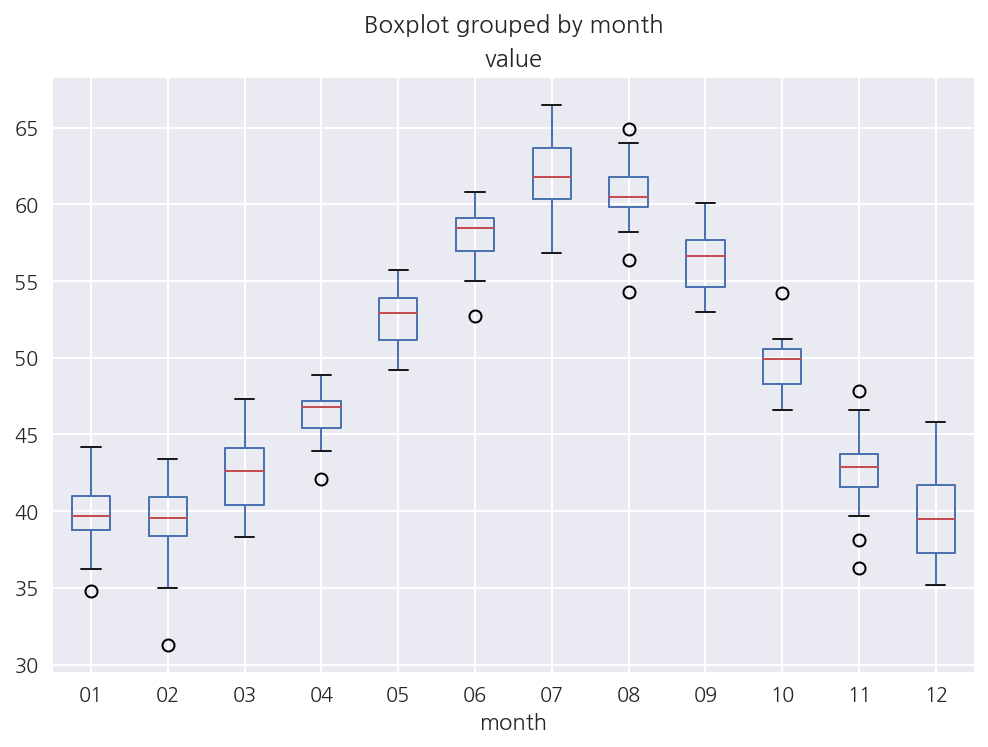

In [21]:
# 월과 기온 관계를 나타낸 박스플롯
df_nottem.boxplot("value", "month")
plt.show()

In [22]:
# 풀랭크 방식
# 범주형 데이터로 인식시키기위해 C()로 표기
model = sm.OLS.from_formula("value ~ C(month) + 0", df_nottem)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     277.3
Date:                Thu, 14 May 2020   Prob (F-statistic):          2.96e-125
Time:                        11:18:52   Log-Likelihood:                -535.82
No. Observations:                 240   AIC:                             1096.
Df Residuals:                     228   BIC:                             1137.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(month)[01]    39.6950      0.518     76.691   

In [23]:
# 축소랭크 방식
# 포뮬러 공식에서 + 0 을 제외하면 풀랭크에서 축소랭크가 됨
# 1월의 데이터가 기준이 됨
model = sm.OLS.from_formula("value ~ C(month)", df_nottem)
result = model.fit()
print(result.summary())

# t : t검정을 했을 경우의 유의 확률
# 귀무가설 : 기준의 월 기온과 다른 월의 기온을 같다고 봐도 된다?

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     277.3
Date:                Thu, 14 May 2020   Prob (F-statistic):          2.96e-125
Time:                        11:20:08   Log-Likelihood:                -535.82
No. Observations:                 240   AIC:                             1096.
Df Residuals:                     228   BIC:                             1137.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         39.6950      0.518     76.

#### 부분 회귀 플롯(Partial Regression Plot)

In [24]:
from sklearn.datasets import load_boston

boston = load_boston()

dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)

model_boston = sm.OLS(dfy, dfX)
result_boston = model_boston.fit()

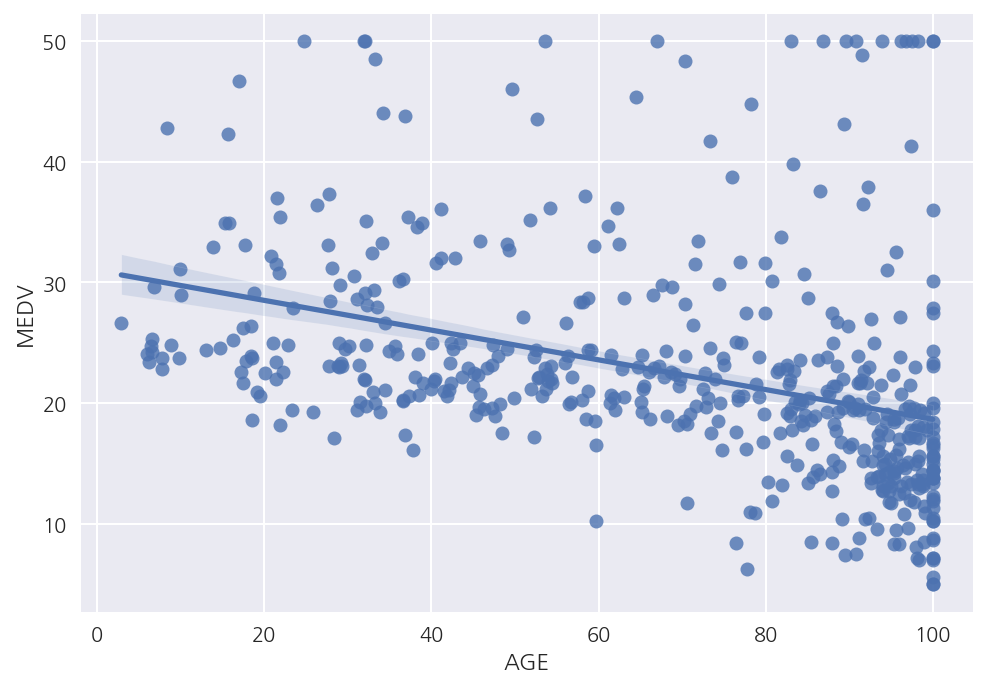

In [25]:
sns.regplot(x="AGE", y="MEDV", data=df)
plt.show()

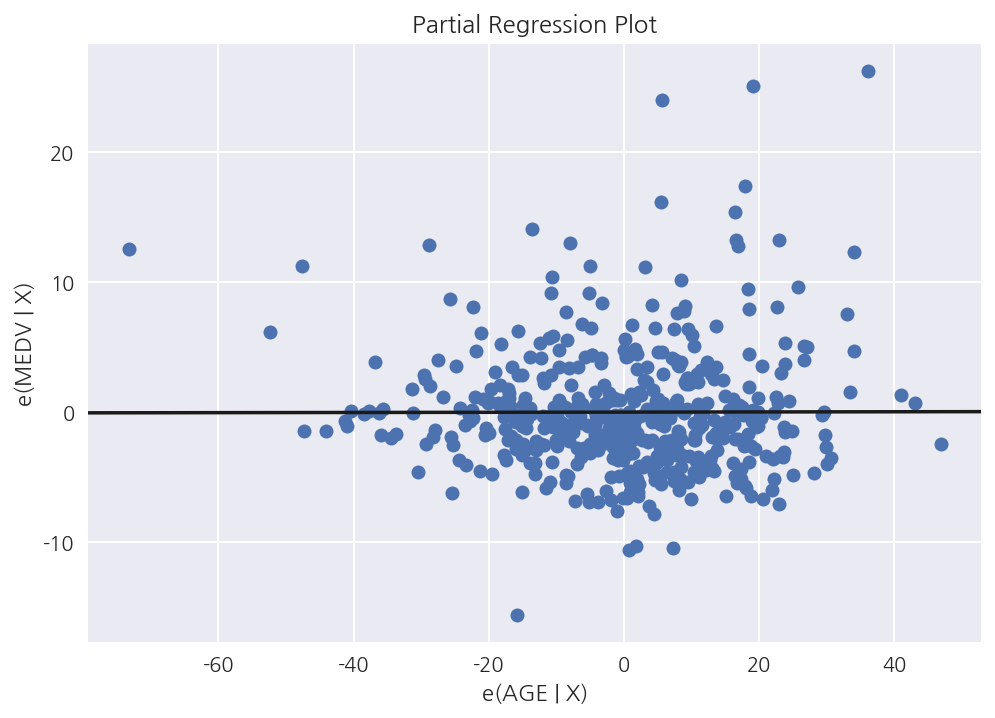

In [27]:
# age만으로는 집값(MEDV)에는 영향을 끼치지 않는다
others = list(set(df.columns).difference(set(["MEDV", "AGE"])))
p, resids = sm.graphics.plot_partregress(
    "MEDV", "AGE", others, data=df, obs_labels=False, ret_coords=True
)
plt.show()

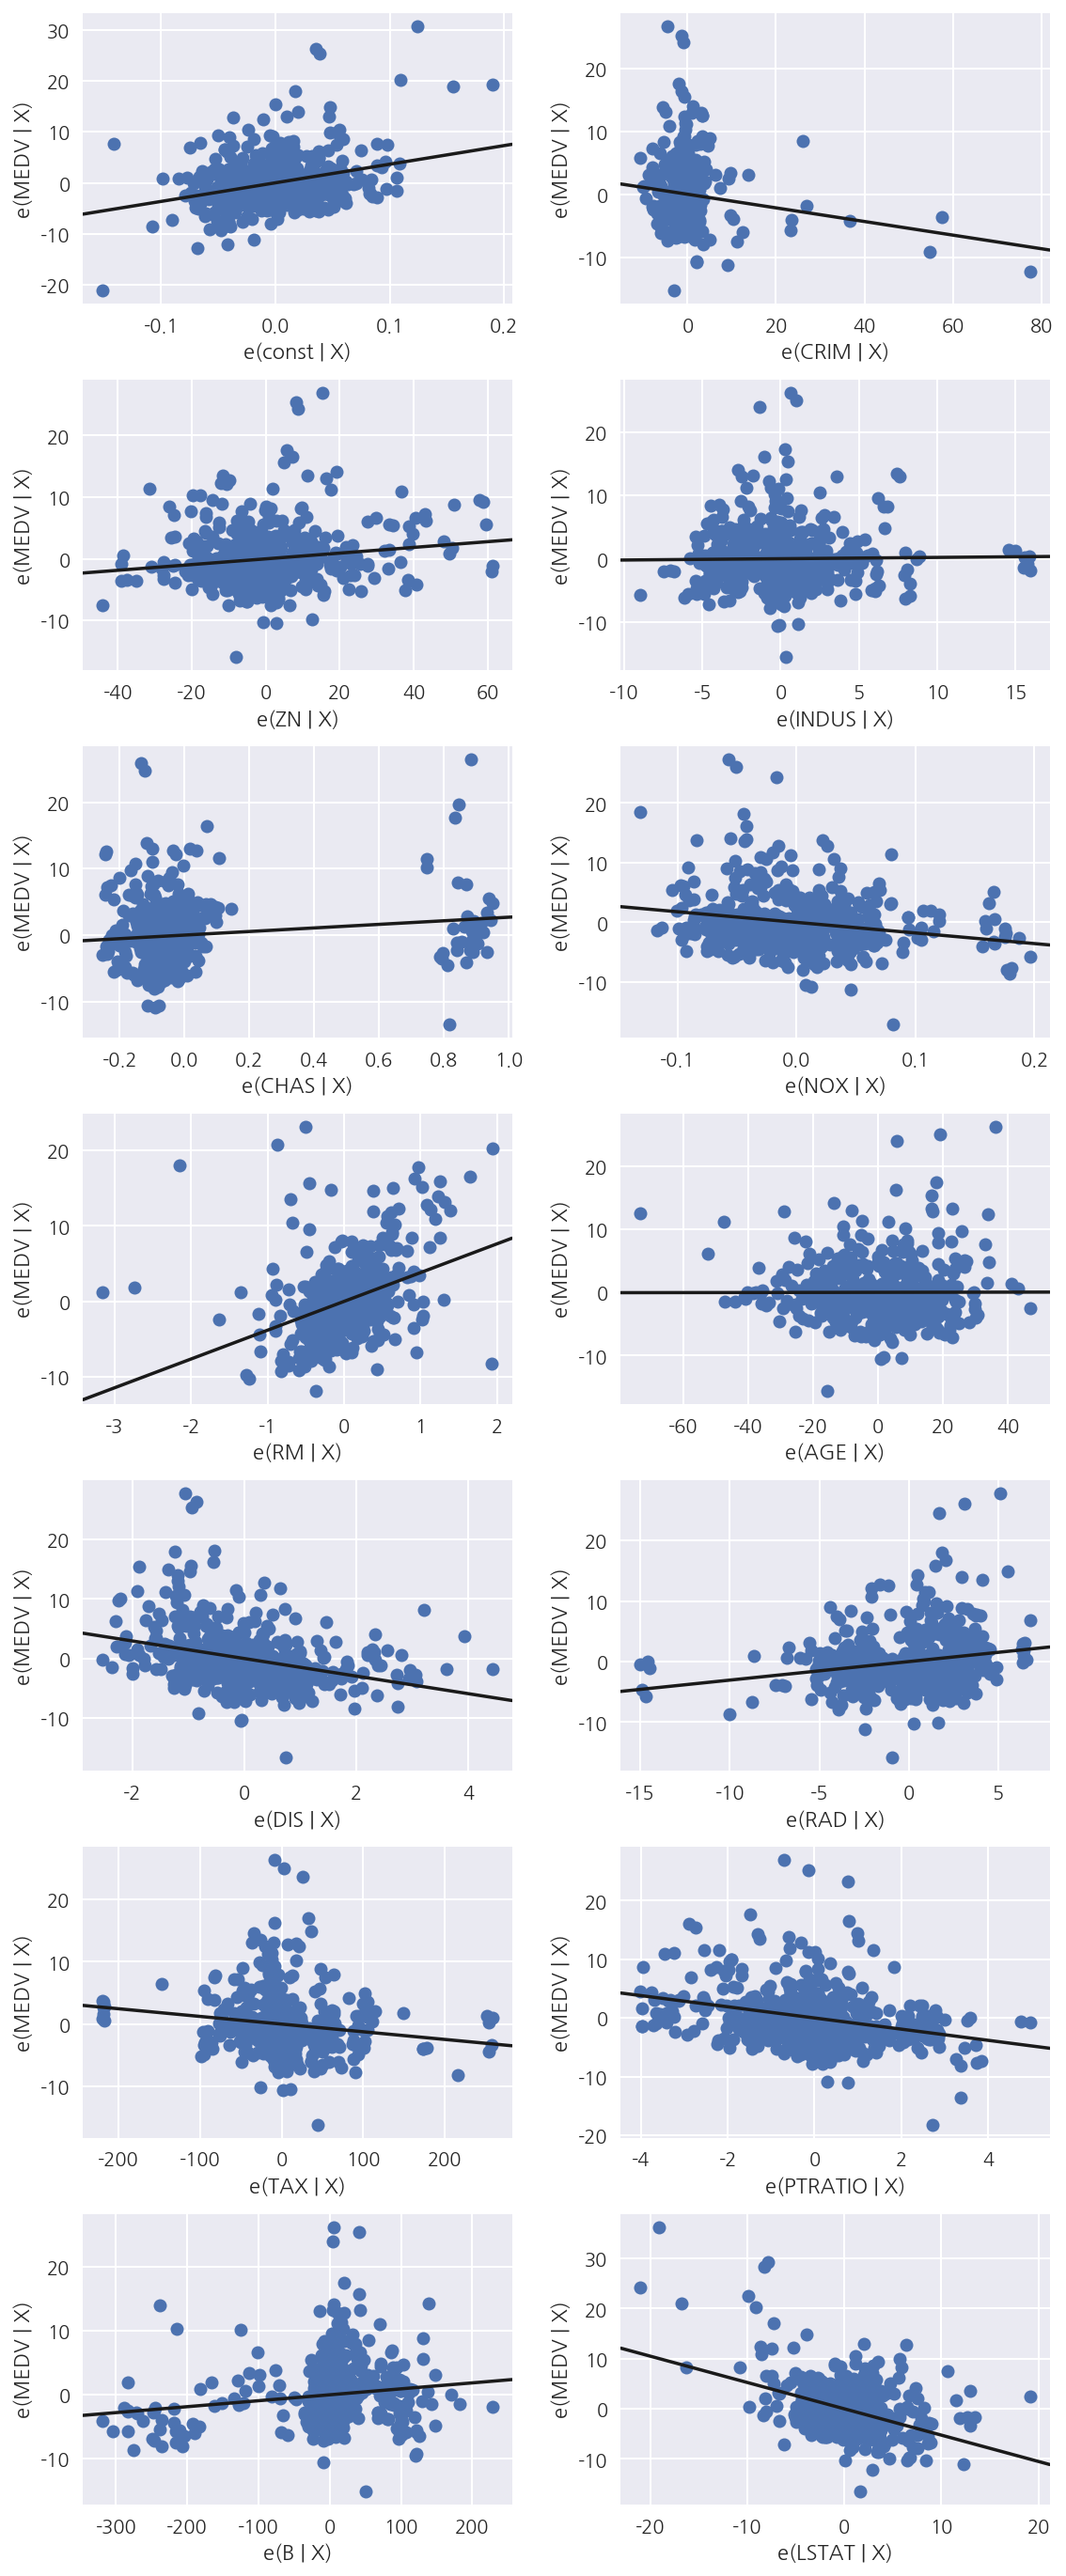

In [28]:
# 전체 데이터에 대해 한번에 부분회귀플롯을 다 그릴수 있음
# plot_partregress_grid(result, fig)
fig = plt.figure(figsize=(8, 20))
sm.graphics.plot_partregress_grid(result_boston, fig=fig)
fig.suptitle("")
plt.show()